# Preface

In [10]:
%matplotlib inline

In [11]:
#format the book
import book_format
book_format.set_style()

In this book we only consider *linear correlation*. We assume that the relationship between variables is linear. That is, a straight line is a good fit for the data. I've fit a straight line through the data in the above chart. The concept of *nonlinear correlation* exists, but we will not be using it.The equation for the covariance between $X$ and $Y$ is$$ COV(X, Y) = \sigma_{xy} = \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]$$Where $\mathbb E[X]$ is the *expected value* of X, defined as$$\mathbb E[X] =  \begin{cases} \sum_{i=1}^n p_ix_i & \mbox{discrete}\\ \int_{-\infty}^\infty f(x)\, x dx & \mbox{continuous}\end{cases}$$We assume each data point is equally likely, so the probability of each is $\frac{1}{N}$, giving$$\mathbb E[X] =  \frac{1}{N}\sum_{i=1}^n x_i$$for the discrete case we will be considering.Compare the covariance equation to the equation for the variance. As you can see they are very similar:$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$In particular, if you compute $COV(X, X)$ you get the equation for $VAR(X)$, which supports my statement that the variance computes how a random variable varies amongst itself.

We use a *covariance matrix* to denote covariances of a multivariate normal distribution, and it looks like this:
$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$

The diagonal contains the variance for each variable, and the off-diagonal elements contain the covariance between the $i^{th}$ and $j^{th}$ variables. So $\sigma_3^2$ is the variance of the third variable, and $\sigma_{13}$ is the covariance between the first and third variables.

A covariance of 0 indicates no correlation. If the variance for $x$ is 10, the variance for $y$ is 4, and there is no linear correlation between $x$ and $y$, then we would write

$$\Sigma = \begin{bmatrix}10&0\\0&4\end{bmatrix}$$

If there was a small amount of positive correlation between $x$ and $y$ we might have

$$\Sigma = \begin{bmatrix}10&1.2\\1.2&4\end{bmatrix}$$

where 1.2 is the covariance between $x$ and $y$. I say the correlation is "small" because the covariance of 1.2 is small relative to the variances of 10. 

If there was a large amount of negative correlation between  between $x$ and $y$ we might have
$$\Sigma = \begin{bmatrix}10&-9.7\\-9.7&4\end{bmatrix}$$

The covariance matrix is symmetric. After all, the covariance between $x$ and $y$ is always equal to the covariance between $y$ and $x$. That is, $\sigma_{xy}=\sigma_{yx}$ for any $x$ and $y$.

## Multivariate Normal Distribution Equation

Recall the equation for the normal distribution from the **Gaussians** chapter:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big [{-\frac{1}{2}}{(x-\mu)^2}/\sigma^2 \Big ]
$$


Here is the multivariate normal distribution in $n$ dimensions.

$$
f(\mathbf{x},\, \mu,\,\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\, \exp  \Big [{ -\frac{1}{2}(\mathbf{x}-\mu)^\mathsf{T}\Sigma^{-1}(\mathbf{x}-\mu) \Big ]}
$$

The multivariate version merely replaces the scalars of the univariate equations with matrices. If you are reasonably well-versed in linear algebra this equation should look quite manageable. If not, don't worry, both FilterPy and SciPy provide functions to compute it for you. Let's ignore the computation for a moment and plot it to see what it looks like.

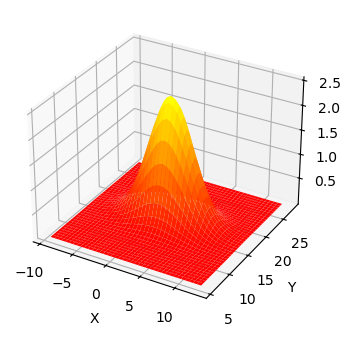

In [15]:
import kf_book.mkf_internal as mkf_internal

mean = [2., 17.]
cov = [[10., 0.], 
       [0., 4.]]

mkf_internal.plot_3d_covariance(mean, cov)


For those of you viewing this online or in Juptyer Notebook on your computer, here is an animation of varying the covariance while holding the variance constant.

<img src='animations/multivariate_ellipse.gif'>

(source: http://git.io/vqxLS)

## Kalman Filter Algorithm

The algorithm is the same Bayesian filter algorithm. The update step is slightly more complicated.

**Initialization**

    1. Initialize the state of the filter
    2. Initialize our belief in the state
    
**Predict**

    1. Use process model to predict state at the next time step
    2. Adjust belief to account for the uncertainty in prediction    
**Update**

    1. Get a measurement and associated belief about its accuracy
    2. Compute residual between estimated state and measurement
    3. Compute scaling factor based on whether the measurement
    or prediction is more accurate
    4. set state between the prediction and measurement based 
    on scaling factor
    5. update belief in the state based on how certain we are 
    in the measurement
    
## Your job as a designer will be to design the state $\left(\mathbf x, \mathbf P\right)$, the process $\left(\mathbf F, \mathbf Q\right)$, the measurement $\left(\mathbf z, \mathbf R\right)$, and the  measurement function $\mathbf H$. If the system has control inputs, such as a robot, you will also design $\mathbf B$ and $\mathbf u$.

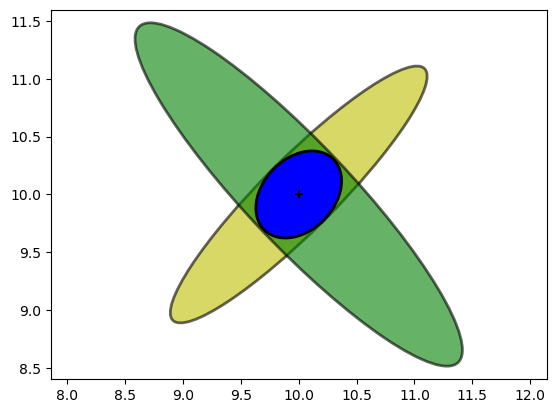

In [13]:
from filterpy.stats import multivariate_multiply
from filterpy.stats import plot_covariance_ellipse
P0 = [[6, 0], [0, 6]]
P1 = [[2, 1.9], [1.9, 2]]
P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
P3 = [[2, -1.9], [-1.9, 2.2]]
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

this shows how error is reduced with 2 gaussians it is similar to how kalman filter works. though in the update step it does not multiply the gaussian direclty but achives somthing similar by levraging the kalman gain

## initliziation and operation of predict step

### Design State Covariance
The other half of the state Gaussian is the covariance matrix $\mathbf P$. In the univariate Kalman filter we specified an initial value for $\sigma^2$, and then the filter took care of updating its value as measurements were added to the filter. The same thing happens in the multidimensional Kalman filter. We specify an initial value for $\mathbf P$ and the filter updates it during each epoch.We need to set the variances to reasonable values. For example, we may choose $\sigma_\mathtt{pos}^2=500 m^2$ if we are quite uncertain about the initial position. Top speed for a dog is around 21 m/s, so in the absence of any other information about the velocity we can set $3\sigma_\mathtt{vel}=21$, or $\sigma_\mathtt{vel}^2=7^2=49$.In the last chapter we showed that the position and velocities are correlated. But how correlated are they for a dog? I have no idea. As we will see the filter computes this for us, so I initialize the covariances to zero. Of course, if you know the covariances you should use them.Recall that the diagonals of the covariance matrix contains the variance of each variable, and the off-diagonal elements contains the covariances. Thus we have:$$\mathbf P = \begin{bmatrix}500 & 0 \\ 0&49\end{bmatrix}$$We can use `numpy.diag`, which creates a diagonal matrix from the values for the diagonal. Recall from linear algebra that a diagonal matrix is one with zeros in the off-diagonal elements.

$\underline{\textbf{Covariance}}$

$$\mathbf{\bar P} = \mathbf{FPF}^\mathsf T + \mathbf Q$$

Expressions in the form $\mathbf{ABA}^\mathsf T$ are common in linear algebra. You can think of it as *projecting* the middle term by the outer term. We will be using this many times in the rest of the book. I admit this may be a 'magical' equation to you. Let's explore it.

When we initialize $\mathbf P$ with

$$\mathbf P = \begin{bmatrix}\sigma^2_x & 0 \\ 0 & \sigma^2_v\end{bmatrix}$$


the value for $\mathbf{FPF}^\mathsf T$ is:

$$\begin{aligned}
\mathbf{FPF}^\mathsf T &= \begin{bmatrix}1&\Delta t\\0&1\end{bmatrix}
\begin{bmatrix}\sigma^2_x & 0 \\  0 & \sigma^2_{v}\end{bmatrix}
\begin{bmatrix}1&0\\\Delta t&1\end{bmatrix} \\
&= \begin{bmatrix}\sigma^2_x&\sigma_v^2\Delta t\\  0 & \sigma^2_{v}\end{bmatrix}
\begin{bmatrix}1&0\\\Delta t&1\end{bmatrix} \\
&= \begin{bmatrix}\sigma^2_x +  \sigma_v^2\Delta t^2  &  \sigma_v^2\Delta t \\
\sigma_v^2\Delta t & \sigma^2_{v}\end{bmatrix}
\end{aligned}$$

The initial value for $\mathbf P$ had no covariance between the position and velocity.  Position is computed as $\dot x\Delta t + x$, so there is a correlation between the position and velocity. The multiplication $\mathbf{FPF}^\mathsf T$ computes a covariance of $\sigma_v^2 \Delta t$. The exact value is not important; you just need to recognize that $\mathbf{FPF}^\mathsf T$ uses the process model to automatically compute the covariance between the position and velocity!

Another way to think of this is to reflect on the $\mathbf{Fx}$ multiplication. That projected $\mathbf x$ forward in time. $\mathbf {FP}$ might seem to be the equivalent operation, but $\mathbf P$ is a matrix while $\mathbf x$ is a vector. The trailing $\mathbf F^\mathsf T$ term ensures that we multiply by both the rows and columns of $\mathbf F$. In the second line of the computation of $\mathbf{FPF}^\mathsf T$ we have the value for $\mathbf{FP}$. You can see that it is an upper triangular matrix because we haven't fully incorporated $\mathbf F$ into the multiplication.

If you have some experience with linear algebra and statistics, this may help. The covariance due to the prediction can be modeled as the expected value of the error in the prediction step, given by this equation. 

$$\begin{aligned}
\bar{\mathbf P} &= \mathbb E[(\mathbf{Fx - F\bar \mu})(\mathbf{Fx - F\bar\mu})^\mathsf T]\\
 &= \mathbf F\, \mathbb E[\mathbf{(x- \bar\mu)(x- \bar\mu)}^\mathsf T]\, \mathbf F^\mathsf T
\end{aligned}$$

Of course, $\mathbb E[\mathbf{(x- \bar\mu)(x- \bar\mu)}^\mathsf T]$ is just $\mathbf P$, giving us

$$\bar{\mathbf P} = \mathbf{FPF}^\mathsf T$$

Let's look at its effect. Here I use $\mathbf F$ from our filter and project the state forward 6/10ths of a second. I do this five times so you can see how $\mathbf{\bar P}$ continues to change. 



Text(0.5, 0, 'Position')

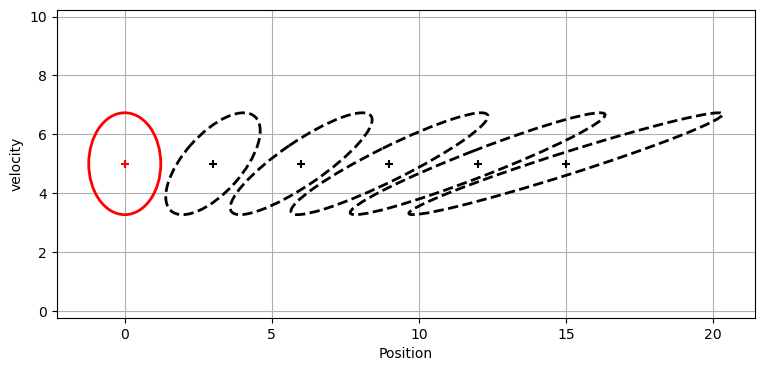

In [53]:
import numpy as np
from kf_book.mkf_internal import plot_covariance_ellipse
import matplotlib.pyplot as plt

dt = 0.6
x = np.array([0., 5.])
F = np.array([[1., dt], [0, 1.]])
P = np.array([[1.5, 0], [0, 3.]])
plot_covariance_ellipse(x, P, edgecolor='r')

for _ in range(5):
    x = F @ x
    P = F @ P @ F.T
    plot_covariance_ellipse(x, P, edgecolor='k', ls='dashed')
plt.ylabel("velocity")
plt.xlabel("Position")

as you can see the elipse becomes thinner because of correlation and mean difference, and the width increase due to the $\Delta t$ term and variance from the algebraic calculation which indicates some loss of information. though can be used with multiplication to make good estimates

### Design of the Process Noise Matrix

In general the design of the $\mathbf Q$ matrix is among the most difficult aspects of Kalman filter design. This is due to several factors. First, the math requires a good foundation in signal theory. Second, we are trying to model the noise in something for which we have little information. Consider trying to model the process noise for a thrown baseball. We can model it as a sphere moving through the air, but that leaves many unknown factors - ball rotation and spin decay, the coefficient of drag of a ball with stitches, the effects of wind and air density, and so on. We develop the equations for an exact mathematical solution for a given process model, but since the process model is incomplete the result for $\mathbf Q$ will also be incomplete. This has a lot of ramifications for the behavior of the Kalman filter. If $\mathbf Q$ is too small then the filter will be overconfident in its prediction model and will diverge from the actual solution. If $\mathbf Q$ is too large than the filter will be unduly influenced by the noise in the measurements and perform sub-optimally. In practice we spend a lot of time running simulations and evaluating collected data to try to select an appropriate value for $\mathbf Q$. But let's start by looking at the math.


Let's assume a kinematic system - some system that can be modeled using Newton's equations of motion. We can make a few different assumptions about this process. 

We have been using a process model of

$$ \dot{\mathbf x} = \mathbf{Ax} + \mathbf{Bu} + \mathbf{w}$$

where $\mathbf{w}$ is the process noise. Kinematic systems are *continuous* - their inputs and outputs can vary at any arbitrary point in time. However, our Kalman filters are *discrete* (there are continuous forms for Kalman filters, but we do not cover them in this book). We sample the system at regular intervals. Therefore we must find the discrete representation for the noise term in the equation above. This depends on what assumptions we make about the behavior of the noise. We will consider two different models for the noise.

### Continuous White Noise Model

We model kinematic systems using Newton's equations. We have either used position and velocity, or position, velocity, and acceleration as the models for our systems. There is nothing stopping us from going further - we can model jerk, jounce, snap, and so on. We don't do that normally because adding terms beyond the dynamics of the real system degrades the estimate. 

Let's say that we need to model the position, velocity, and acceleration. We can then assume that acceleration is constant for each discrete time step. Of course, there is process noise in the system and so the acceleration is not actually constant. The tracked object will alter the acceleration over time due to external, unmodeled forces. In this section we will assume that the acceleration changes by a continuous time zero-mean white noise $w(t)$. In other words, we are assuming that the small changes in velocity average to 0 over time (zero-mean). 

Since the noise is changing continuously we will need to integrate to get the discrete noise for the discretization interval that we have chosen. We will not prove it here, but the equation for the discretization of the noise is

$$\mathbf Q = \int_0^{\Delta t} \mathbf F(t)\mathbf{Q_c}\mathbf F^\mathsf{T}(t) dt$$

where $\mathbf{Q_c}$ is the continuous noise. The general reasoning should be clear. $\mathbf F(t)\mathbf{Q_c}\mathbf F^\mathsf{T}(t)$ is a projection of the continuous noise based on our process model $\mathbf F(t)$ at the instant $t$. We want to know how much noise is added to the system over a discrete intervat $\Delta t$, so we integrate this expression over the interval $[0, \Delta t]$. 

We know the fundamental matrix for Newtonian systems is

$$F = \begin{bmatrix}1 & \Delta t & {\Delta t}^2/2 \\ 0 & 1 & \Delta t\\ 0& 0& 1\end{bmatrix}$$

We define the continuous noise as 

$$\mathbf{Q_c} = \begin{bmatrix}0&0&0\\0&0&0\\0&0&1\end{bmatrix} \Phi_s$$

where $\Phi_s$ is the spectral density of the white noise. This can be derived, but is beyond the scope of this book. See any standard text on stochastic processes for the details. In practice we often do not know the spectral density of the noise, and so this turns into an "engineering" factor - a number we experimentally tune until our filter performs as we expect. You can see that the matrix that $\Phi_s$ is multiplied by effectively assigns the power spectral density to the acceleration term. This makes sense; we assume that the system has constant acceleration except for the variations caused by noise. The noise alters the acceleration.

We could carry out these computations ourselves, but I prefer using SymPy to solve the equation.

$$\mathbf{Q_c} = \begin{bmatrix}0&0&0\\0&0&0\\0&0&1\end{bmatrix} \Phi_s$$



In [ ]:
import sympy
from sympy import (init_printing, Matrix, MatMul, 
                   integrate, symbols)

init_printing(use_latex='mathjax')
dt, phi = symbols('\Delta{t} \Phi_s')
F_k = Matrix([[1, dt, dt**2/2],
              [0,  1,      dt],
              [0,  0,       1]])
Q_c = Matrix([[0, 0, 0],
              [0, 0, 0],
              [0, 0, 1]])*phi

Q = integrate(F_k * Q_c * F_k.T, (dt, 0, dt))

# factor phi out of the matrix to make it more readable
Q = Q / phi
MatMul(Q, phi)

For completeness, let us compute the equations for the 0th order and 1st order equations.


In [ ]:
F_k = Matrix([[1]])
Q_c = Matrix([[phi]])

print('0th order discrete process noise')
integrate(F_k*Q_c*F_k.T,(dt, 0, dt))

In [ ]:
F_k = Matrix([[1, dt],
              [0, 1]])
Q_c = Matrix([[0, 0],
              [0, 1]]) * phi

Q = integrate(F_k * Q_c * F_k.T, (dt, 0, dt))

print('1st order discrete process noise')
# factor phi out of the matrix to make it more readable
Q = Q / phi
MatMul(Q, phi)

### Piecewise White Noise Model

Another model for the noise assumes that the that highest order term (say, acceleration) is constant for the duration of each time period, but differs for each time period, and each of these is uncorrelated between time periods. In other words there is a discontinuous jump in acceleration at each time step. This is subtly different than the model above, where we assumed that the last term had a continuously varying noisy signal applied to it.  

We will model this as

$$f(x)=Fx+\Gamma w$$

where $\Gamma$ is the *noise gain* of the system, and $w$ is the constant piecewise acceleration (or velocity, or jerk, etc). 

Let's start by looking at a first order system. In this case we have the state transition function

$$\mathbf{F} = \begin{bmatrix}1&\Delta t \\ 0& 1\end{bmatrix}$$

In one time period, the change in velocity will be $w(t)\Delta t$, and the change in position will be $w(t)\Delta t^2/2$, giving us

$$\Gamma = \begin{bmatrix}\frac{1}{2}\Delta t^2 \\ \Delta t\end{bmatrix}$$

The covariance of the process noise is then

$$Q = \mathbb E[\Gamma w(t) w(t) \Gamma^\mathsf{T}] = \Gamma\sigma^2_v\Gamma^\mathsf{T}$$.

We can compute that with SymPy as follows

In [ ]:
var = symbols('sigma^2_v')
v = Matrix([[dt**2 / 2], [dt]])

Q = v * var * v.T

# factor variance out of the matrix to make it more readable
Q = Q / var
MatMul(Q, var)

The second order system proceeds with the same math.


$$\mathbf{F} = \begin{bmatrix}1 & \Delta t & {\Delta t}^2/2 \\ 0 & 1 & \Delta t\\ 0& 0& 1\end{bmatrix}$$

Here we will assume that the white noise is a discrete time Wiener process. This gives us

$$\Gamma = \begin{bmatrix}\frac{1}{2}\Delta t^2 \\ \Delta t\\ 1\end{bmatrix}$$

There is no 'truth' to this model, it is just convenient and provides good results. For example, we could assume that the noise is applied to the jerk at the cost of a more complicated equation. 

The covariance of the process noise is then

$$Q = \mathbb E[\Gamma w(t) w(t) \Gamma^\mathsf{T}] = \Gamma\sigma^2_v\Gamma^\mathsf{T}$$.

We can compute that with SymPy as follows

In [ ]:
var = symbols('sigma^2_v')
v = Matrix([[dt**2 / 2], [dt], [1]])

Q = v * var * v.T

# factor variance out of the matrix to make it more readable
Q = Q / var
MatMul(Q, var)

We cannot say that this model is more or less correct than the continuous model - both are approximations to what is happening to the actual object. Only experience and experiments can guide you to the appropriate model. In practice you will usually find that either model provides reasonable results, but typically one will perform better than the other.

The advantage of the second model is that we can model the noise in terms of $\sigma^2$ which we can describe in terms of the motion and the amount of error we expect. The first model requires us to specify the spectral density, which is not very intuitive, but it handles varying time samples much more easily since the noise is integrated across the time period. However, these are not fixed rules - use whichever model (or a model of your own devising) based on testing how the filter performs and/or your knowledge of the behavior of the physical model.

A good rule of thumb is to set $\sigma$ somewhere from $\frac{1}{2}\Delta a$ to $\Delta a$, where $\Delta a$ is the maximum amount that the acceleration will change between sample periods. In practice we pick a number, run simulations on data, and choose a value that works well.

### Using FilterPy to Compute Q

FilterPy offers several routines to compute the $\mathbf Q$ matrix. The function `Q_continuous_white_noise()` computes $\mathbf Q$ for a given value for $\Delta t$ and the spectral density.

In [ ]:
from filterpy.common import Q_continuous_white_noise
from filterpy.common import Q_discrete_white_noise

Q = Q_continuous_white_noise(dim=2, dt=1, spectral_density=1)
print(Q)

In [ ]:
Q = Q_continuous_white_noise(dim=3, dt=1, spectral_density=1)
print(Q)

The function `Q_discrete_white_noise()` computes $\mathbf Q$ assuming a piecewise model for the noise.

In [ ]:
Q = Q_discrete_white_noise(2, var=1.)
print(Q)

In [ ]:
Q = Q_discrete_white_noise(3, var=1.)
print(Q)

### Simplification of Q

Many treatments use a much simpler form for $\mathbf Q$, setting it to zero except for a noise term in the lower rightmost element. Is this justified? Well, consider the value of $\mathbf Q$ for a small $\Delta t$

In [ ]:
import numpy as np

np.set_printoptions(precision=8)
Q = Q_continuous_white_noise(
    dim=3, dt=0.05, spectral_density=1)
print(Q)
np.set_printoptions(precision=3)

We can see that most of the terms are very small. Recall that the only equation using this matrix is

$$ \mathbf P=\mathbf{FPF}^\mathsf{T} + \mathbf Q$$

If the values for $\mathbf Q$ are small relative to $\mathbf P$
then it will be contributing almost nothing to the computation of $\mathbf P$. Setting $\mathbf Q$ to the zero matrix except for the lower right term

$$\mathbf Q=\begin{bmatrix}0&0&0\\0&0&0\\0&0&\sigma^2\end{bmatrix}$$

while not correct, is often a useful approximation. If you do this for an important application you will have to perform quite a few studies to guarantee that your filter works in a variety of situations. 

If you do this, 'lower right term' means the most rapidly changing term for each variable. If the state is $x=\begin{bmatrix}x & \dot x & \ddot{x} & y & \dot{y} & \ddot{y}\end{bmatrix}^\mathsf{T}$ Then $\mathbf Q$ will be 6x6; the elements for both $\ddot{x}$ and $\ddot{y}$ will have to be set to non-zero in $\mathbf Q$.

### State Variable
$$\mathbf x =\begin{bmatrix}x \\ \dot x\end{bmatrix}$$

We use $\mathbf x$ instead of $\mu$, but recognize this is the mean of the multivariate Gaussian.

### satesapce and zoh for process model, as such predict is done


<u>**Predict**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
\bar \mu = \mu + \mu_{f_x} & \bar x = x + dx & \bar{\mathbf x} = \mathbf{Fx} + \mathbf{Bu}\\
\bar\sigma^2 = \sigma_x^2 + \sigma_{f_x}^2 & \bar P = P + Q & \bar{\mathbf P} = \mathbf{FPF}^\mathsf T + \mathbf Q \\
\hline
\end{array}$

Without worrying about the specifics of the linear algebra, we can see that:

$\mathbf x,\, \mathbf P$ are the state mean and covariance. They correspond to $x$ and $\sigma^2$.

$\mathbf F$ is the *state transition function*. When multiplied by $\bf x$ it computes the prior. 

$\mathbf Q$ is the process covariance. It corresponds to $\sigma^2_{f_x}$.

$\mathbf B$ and $\mathbf u$ They let us model control inputs to the system. i.e what is actuated.

## initliziation and operation of update step

it uses the uncetainty of the meassurement to update the state/mean and the coovariance of the distribution


### Design the Measurement Function

The Kalman filter computes the update step in what we call *measurement space*. We mostly ignored this issue in the univariate chapter because of the complication it adds. We tracked our dog's position using a sensor that reported his position. Computing the *residual* was easy - subtract the filter's predicted position from the measurement:

$$ \mathtt{residual} = \mathtt{measured\, \, position} - \mathtt{predicted\, \, position}$$

We need to compute the residual because we scale it by the Kalman gain to get the new estimate.

What would happen if we were trying to track temperature using a thermometer that outputs a voltage corresponding to the temperature reading? The equation for the residual computation would be meaningless; you can't subtract a temperature from a voltage.

$$ \mathtt{residual} = \mathtt{voltage} - \mathtt{temperature}\;\;\;(NONSENSE!)$$


We need to convert the temperature into a voltage so we can perform the subtraction. For the thermometer we might write:

```python
CELSIUS_TO_VOLTS = 0.21475
residual = voltage - (CELSIUS_TO_VOLTS * predicted_temperature)
```
    
The Kalman filter generalizes this problem by having you supply a *measurement function* that converts a state into a measurement. 

Why are we working in measurement space? Why not work in state space by converting the voltage into a temperature, allowing the residual to be a difference in temperature?

We cannot do that because most measurements are not *invertible*. The state for the tracking problem contains the hidden variable $\dot x$. There is no way to convert a measurement of position into a state containing velocity. On the other hand, it is trivial to convert a state containing position and velocity into a equivalent "measurement" containing only position. We have to work in measurement space to make the computation of the residual possible.

Both the measurement $\mathbf z$ and state $\mathbf x$ are vectors so we need to use a matrix to perform the conversion. The Kalman filter equation that performs this step is:

$$\mathbf y = \mathbf z - \mathbf{H \bar x}$$

where $\mathbf y$ is the residual, $\mathbf{\bar x}$ is the prior, $\mathbf z$ is the measurement, and $\mathbf H$ is the measurement function. So we take the prior, convert it to a measurement by multiplying it with $\mathbf H$, and subtract that from the measurement. This gives us the difference between our prediction and measurement in measurement space!
<img src="./figs/residual_chart_with_h.png">

####  Design the Measurement

The measurement is implemented with $\mathbf z$, the measurement mean, and $\mathbf R$, the measurement covariance. 

$\mathbf z$ is easy. it contains the measurement(s) as a vector. We have only one measurement, so we have:

$$\mathbf z = \begin{bmatrix}z\end{bmatrix}$$

If we have two sensors or measurements we'd have:

$$\mathbf z = \begin{bmatrix}z_1 \\ z_2\end{bmatrix}$$


The *measurement noise matrix* models the noise in our sensors as a covariance matrix. In practice this can be difficult. A complicated system may have many sensors, the correlation between them might not be clear, and usually their noise is not a pure Gaussian. For example, a sensor might be biased to read high if the temperature is high, and so the noise is not distributed equally on both sides of the mean. We will learn to deal with these problems later.

The Kalman filter equations uses a covariance matrix $\mathbf R$ for the measurement noise. The matrix will have dimension $m{\times}m$, where $m$ is the number of sensors. It is a covariance matrix to account for correlations between the sensors. We have only 1 sensor so $\mathbf R$ is:

$$\mathbf R = \begin{bmatrix}\sigma^2_z\end{bmatrix}$$

If we had two position sensors, the first with a variance of 5 m$^2$, the second with a variance of 3 m$^2$, we would write

$$\mathbf R = \begin{bmatrix}5&0\\0&3\end{bmatrix}$$

We put the variances on the diagonal because this is a *covariance* matrix, where the variances lie on the diagonal, and the covariances, if any, lie in the off-diagonal elements. Here we assume there is no correlation in the noise between the two sensors, so the covariances are 0.



#### kalman gain
$$
\begin{aligned}
\textbf{S} &= \mathbf{H\bar PH}^\mathsf T + \mathbf R \\
\mathbf K &= \mathbf{\bar PH}^\mathsf T \mathbf{S}^{-1} \\
\end{aligned}$$


We select our new state to be along the residual, scaled by the Kalman gain. The scaling is performed by $\mathbf{Ky}$, which both scales the residual and converts it back into state space with the $\mathbf H^\mathsf T$ term which is in $\mathbf K$. This is added to the prior, yielding the equation: $\mathbf x =\mathbf{\bar x} + \mathbf{Ky}$. Let me write out $\mathbf K$ so we can see the entire computation:
$$\begin{aligned}
\mathbf x &= \mathbf{\bar x} + \mathbf{Ky} \\
&= \mathbf{\bar x} + \mathbf{\bar PH}^\mathsf T \mathbf{S}^{-1}\mathbf y \\
&\approx \mathbf{\bar x} + \frac{\mathsf{uncertainty}_\mathsf{prediction}}{\mathsf{uncertainty}_\mathsf{measurement}}\mathbf H^\mathsf T \mathbf y
\end{aligned}$$

I've presented the equation to compute the posterior covariance as

$$\mathbf P = (\mathbf I - \mathbf{KH})\mathbf{\bar P}$$

and while strictly speaking this is correct, this is not how I compute it in `FilterPy`, where I use the *Joseph* equation


$$\mathbf P = (\mathbf I-\mathbf {KH})\mathbf{\bar P}(\mathbf I-\mathbf{KH})^\mathsf T + \mathbf{KRK}^\mathsf T$$


I frequently get emails and/or GitHub issues raised, claiming the implementation is a bug. It is not a bug, and I use it for several reasons. First, the subtraction $(\mathbf I - \mathbf{KH})$ can lead to nonsymmetric matrix results due to floating point errors. Covariances must be symmetric, and so becoming nonsymmetric usually leads to the Kalman filter diverging, or even for the code to raise an exception because of the checks built into `NumPy`.

<u>**Update**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
& y = z - \bar x & \mathbf y = \mathbf z - \mathbf{H\bar x} \\
& K = \frac{\bar P}{\bar P+R}&
\mathbf K = \mathbf{\bar{P}H}^\mathsf T (\mathbf{H\bar{P}H}^\mathsf T + \mathbf R)^{-1} \\
\mu=\frac{\bar\sigma^2\, \mu_z + \sigma_z^2 \, \bar\mu} {\bar\sigma^2 + \sigma_z^2} & x = \bar x + Ky & \mathbf x = \bar{\mathbf x} + \mathbf{Ky} \\
\sigma^2 = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} & P = (1-K)\bar P &
\mathbf P = (\mathbf I-\mathbf {KH})\mathbf{\bar P}(\mathbf I-\mathbf{KH})^\mathsf T + \mathbf{KRK}^\mathsf T \\
\hline
\end{array}$

$\mathbf H$ is the measurement function.

$\mathbf z,\, \mathbf R$ are the measurement mean and noise covariance. They correspond to $z$ and $\sigma_z^2$ in the univariate filter (I've substituted $\mu$ with $x$ for the univariate equations to make the notation as similar as possible).

$\mathbf y$ and $\mathbf K$ are the residual and Kalman gain. 

The details will be different than the univariate filter because these are vectors and matrices, but the concepts are exactly the same: 

-  Use a Gaussian to represent our estimate of the state and error
-  Use a Gaussian to represent the measurement and its error
-  Use a Gaussian to represent the process model
-  Use the process model to predict the next state (the prior)
-  Form an estimate part way between the measurement and the prior

Your job as a designer will be to design the state $\left(\mathbf x, \mathbf P\right)$, the process $\left(\mathbf F, \mathbf Q\right)$, the measurement $\left(\mathbf z, \mathbf R\right)$, and the  measurement function $\mathbf H$. If the system has control inputs, such as a robot, you will also design $\mathbf B$ and $\mathbf u$.

a form of the equations that you will see in the literature. There are many different notation systems used, but this gives you an idea of what to expect.

 $$
\begin{aligned}
\hat{\mathbf x}_{k\mid k-1} &= \mathbf F_k\hat{\mathbf x}_{k-1\mid k-1} + \mathbf B_k \mathbf u_k  \\
\mathbf P_{k\mid k-1} &=  \mathbf F_k \mathbf P_{k-1\mid k-1} \mathbf F_k^\mathsf T + \mathbf Q_k \\        	
\tilde{\mathbf y}_k &= \mathbf z_k - \mathbf H_k\hat{\mathbf x}_{k\mid k-1}\\
\mathbf{S}_k &= \mathbf H_k \mathbf P_{k\mid k-1} \mathbf H_k^\mathsf T + \mathbf R_k \\
\mathbf K_k &= \mathbf P_{k\mid k-1}\mathbf H_k^\mathsf T \mathbf{S}_k^{-1}\\
\hat{\mathbf x}_{k\mid k} &= \hat{\mathbf x}_{k\mid k-1} + \mathbf K_k\tilde{\mathbf y}_k\\
\mathbf P_{k|k} &= (I - \mathbf K_k \mathbf H_k) \mathbf P_{k|k-1}
\\\end{aligned}
$$

This notation uses the Bayesian $a\mid b$ notation, which means $a$ given the evidence of $b$. The hat means estimate. Thus $\hat{\mathbf x}_{k\mid k}$ means the estimate of the state $\mathbf x$ at step $k$ (the first $k$) given the evidence from step $k$ (the second $k$). The posterior, in other words. $\hat{\mathbf x}_{k\mid k-1}$ means the estimate for the state $\mathbf x$ at step $k$ given the estimate from step $k - 1$. The prior, in other words. 

This notation, copied from [Wikipedia](https://en.wikipedia.org/wiki/Kalman_filter#Details) [[1]](#[wiki_article]), allows a mathematician to express himself exactly.